In [ ]:
!pip install ultralytics
!pip install roboflow
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# Get Dataset

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="q7XTKjpoSFyroQryJ6rn")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-1 in yolov5pytorch:: 100%|██████████| 1338/1338 [00:00<00:00, 1579.03it/s]


In [4]:
dataset.location

'/content/football-players-detection-1'

In [5]:
import shutil

shutil.move('football-players-detection-1/train',
            'football-players-detection-1/football-players-detection-1/train'
            )

shutil.move('football-players-detection-1/test',
            'football-players-detection-1/football-players-detection-1/test'
            )

shutil.move('football-players-detection-1/valid',
            'football-players-detection-1/football-players-detection-1/valid'
            )

'football-players-detection-1/football-players-detection-1/valid'

# Training

In [6]:
!yolo task=detect mode=train model=yolov5x.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov5x.pt' with new 'model=yolov5xu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

100% 186M/186M [00:01<00:00, 126MB/s]
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5x.pt, data=/content/football-players-detection-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, ver

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/content/runs/detect/train/results.csv"
df = pd.read_csv(file_path)

In [9]:
# Compute total training and validation loss
df["train_total_loss"] = df["train/box_loss"] + df["train/cls_loss"] + df["train/dfl_loss"]
df["val_total_loss"] = df["val/box_loss"] + df["val/cls_loss"] + df["val/dfl_loss"]

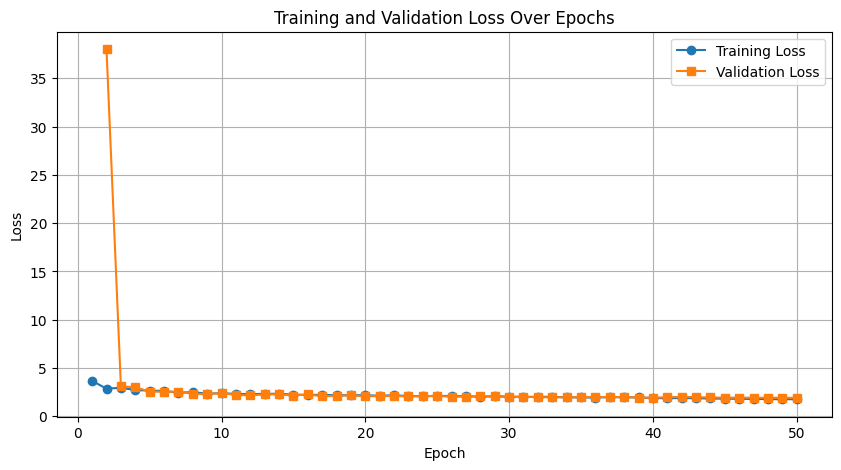

In [10]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["train_total_loss"], label="Training Loss", marker="o")
plt.plot(df["epoch"], df["val_total_loss"], label="Validation Loss", marker="s")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


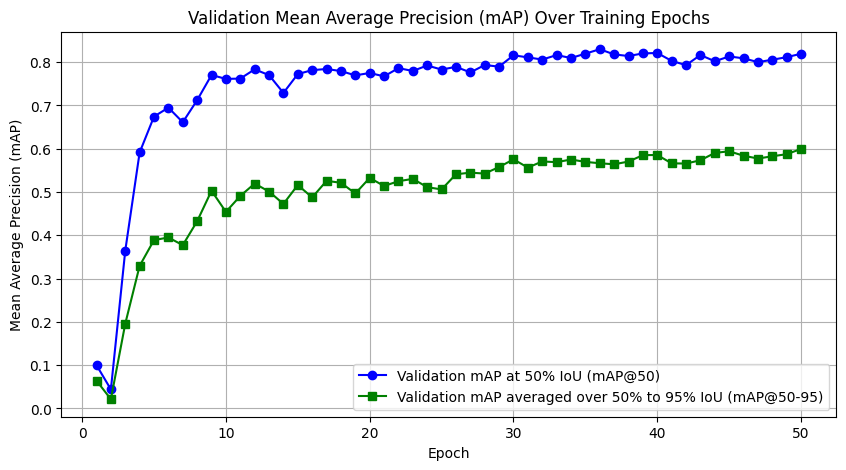

In [11]:
# Plot validation mAP metrics
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="Validation mAP at 50% IoU (mAP@50)", marker="o", color="b")
plt.plot(df["epoch"], df["metrics/mAP50-95(B)"], label="Validation mAP averaged over 50% to 95% IoU (mAP@50-95)", marker="s", color="g")

plt.xlabel("Epoch")
plt.ylabel("Mean Average Precision (mAP)")
plt.title("Validation Mean Average Precision (mAP) Over Training Epochs")
plt.legend()
plt.grid(True)
plt.show()

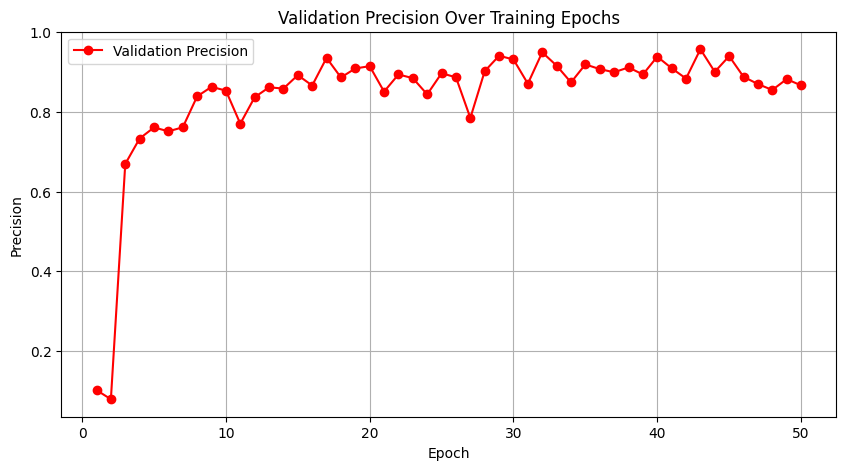

In [12]:
# Plot validation precision
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Validation Precision", marker="o", color="r")

plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Validation Precision Over Training Epochs")
plt.legend()
plt.grid(True)
plt.show()

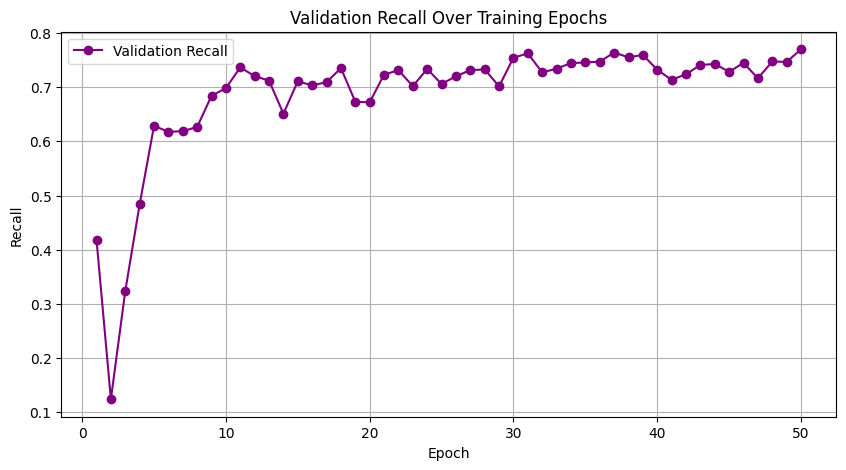

In [13]:
# Plot validation recall
plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Validation Recall", marker="o", color="purple")

plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Validation Recall Over Training Epochs")
plt.legend()
plt.grid(True)
plt.show()

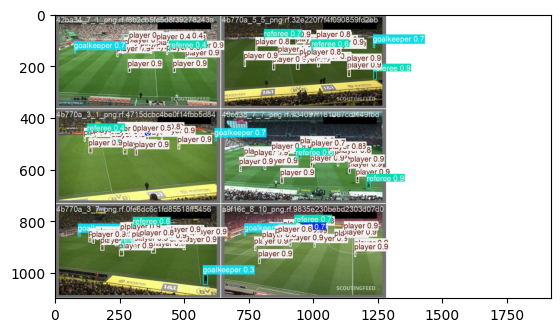

In [16]:
plt.imshow(plt.imread("/content/runs/detect/train/val_batch1_pred.jpg"))
plt.show()

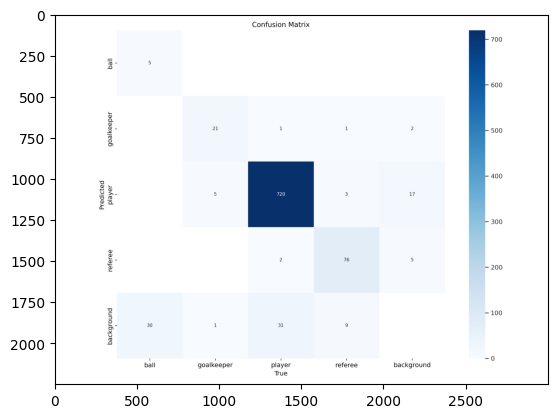

In [17]:
plt.imshow(plt.imread("/content/runs/detect/train/confusion_matrix.png"))
plt.show()